In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True) 

In [3]:
fields = ['Gen Unit', 'Time', 'GLOAD (MW)', 'OP_TIME', 'STATE']
df_labels = pd.read_csv('kmean_labels.csv', usecols=['Gen Unit', 'labels'])
df_gen = pd.read_csv('cems_forLabelMerge.csv', usecols=fields)

In [4]:
df_labels.head()

,Gen Unit,labels
0,AES Alamitos1,3
1,AES Alamitos2,3
2,AES Alamitos3,3
3,AES Alamitos4,3
4,AES Alamitos5,3


In [5]:
df_labels.describe()

,labels
count,994.0
mean,1.2
std,1.2
min,0.0
25%,0.0
50%,1.0
75%,2.0
max,3.0


In [6]:
df_gen.head()

,STATE,OP_TIME,GLOAD (MW),Gen Unit,Time
0,AL,0.0,0.0,Barry1,2015-01-01 00:00:00
1,AL,0.0,0.0,Barry1,2015-01-01 01:00:00
2,AL,0.0,0.0,Barry1,2015-01-01 02:00:00
3,AL,0.0,0.0,Barry1,2015-01-01 03:00:00
4,AL,0.0,0.0,Barry1,2015-01-01 04:00:00


In [7]:
df = pd.merge(df_labels, df_gen, on=['Gen Unit'])

In [8]:
df.head()

,Gen Unit,labels,STATE,OP_TIME,GLOAD (MW),Time
0,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 00:00:00
1,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 01:00:00
2,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 02:00:00
3,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 03:00:00
4,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 04:00:00


In [9]:
len(df)

6685296

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
df.dtypes

Gen Unit              object
labels                 int64
STATE                 object
OP_TIME              float64
GLOAD (MW)           float64
Time          datetime64[ns]
dtype: object

In [17]:
df.head()

,Gen Unit,labels,STATE,OP_TIME,GLOAD (MW),Time
0,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 00:00:00
1,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 01:00:00
2,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 02:00:00
3,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 03:00:00
4,AES Alamitos1,3,CA,0.0,0.0,2015-01-01 04:00:00


In [14]:
df['labels'].value_counts().sort_index()

0    2033448
1    2117736
2     576144
3    1957968
Name: labels, dtype: int64

In [38]:
#format zero cluster for random graph
zero_cluster = df[df['labels']==0]
pivote_zero = zero_cluster.pivot_table(values = 'GLOAD (MW)', index = 'Gen Unit', columns = 'Time')
pivote_zero

Time,2015-01-01 00:00:00,2015-01-01 01:00:00,2015-01-01 02:00:00,2015-01-01 03:00:00,2015-01-01 04:00:00,2015-01-01 05:00:00,2015-01-01 06:00:00,2015-01-01 07:00:00,2015-01-01 08:00:00,2015-01-01 09:00:00,...,2015-12-31 14:00:00,2015-12-31 15:00:00,2015-12-31 16:00:00,2015-12-31 17:00:00,2015-12-31 18:00:00,2015-12-31 19:00:00,2015-12-31 20:00:00,2015-12-31 21:00:00,2015-12-31 22:00:00,2015-12-31 23:00:00
Gen Unit,,,,,,,,,,,,,,,,,,,,,
Alfred L Pierce Generating StationAP-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arvah B HopkinsHC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arvah B HopkinsHC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascend (Decatur Plant)X015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascend (Decatur Plant)Z005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascend (Decatur Plant)Z006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auburndale Peaker Energy Center6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avon ParkP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avon ParkP2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


100
[]


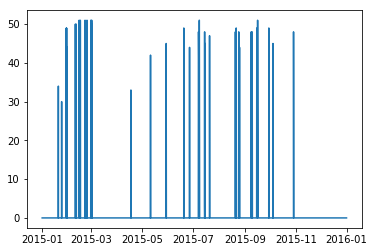

In [55]:
#started working on random generator, still doesn't work
#result should show random number, name of plant, and gen profile
random_index = randint(0,len(pivote_zero))
print(random_index)
name = np.where(pivote_zero.index == random_index)[0]
print(name)
plt.plot(pivote_zero.iloc[random_index])
plt.show()

In [ ]:
plt.plot(pivote_zero.iloc[random])
plt.show()

In [74]:
one_cluster = df[df['labels']==1]

In [77]:
two_cluster = df[df['labels']==2]

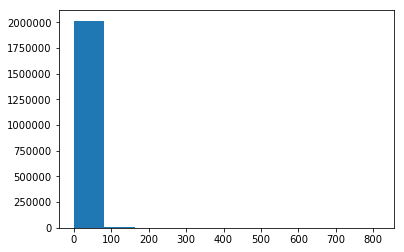

In [33]:
y0 = zero_cluster['GLOAD (MW)']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y0)
plt.show()

In [82]:
y1 = one_cluster['GLOAD (MW)']

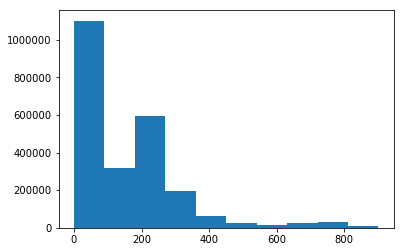

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y1)
plt.show()

In [84]:
y2 = two_cluster['GLOAD (MW)']

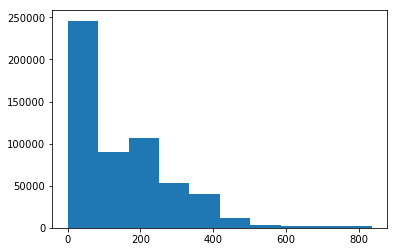

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y2)
plt.show()

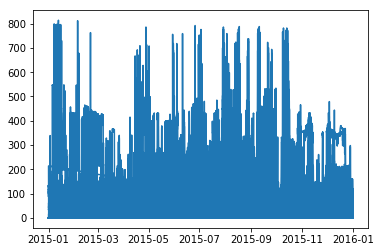

In [88]:
x = zero_cluster['Time']
y = zero_cluster['GLOAD (MW)']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
plt.show()

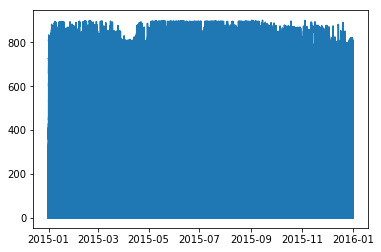

In [89]:
x = one_cluster['Time']
y = one_cluster['GLOAD (MW)']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
plt.show()

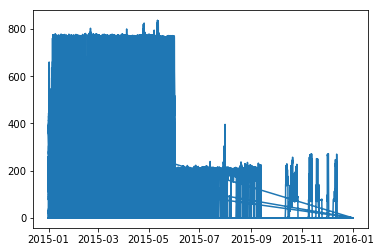

In [90]:
x = two_cluster['Time']
y = two_cluster['GLOAD (MW)']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
plt.show()

In [99]:
def graph_cluster(cluster):
    random = random.randrange(0, (len(cluster)))
    row = cluster.iloc(random)
    x = row['Time']
    y = row['GL']

int